# Mesure de la fréquence d'un signal

Un autre exemple d'utilisation de l'intecorrélation est la mesure de la fréquence d'un signal. Si on dispose d'un signal sinusoïdal $x$, mais qu'il est très bruité et que l'on cherche sa fréquence inconnue, alors on peut représenter l'intercorrélation de $x$ avec plusieurs sinusoïdes $y$ dont on connaît la fréquence. La sinusoïde qui permet d'obtenir la plus grande intercorrélation sera la plus ressemblante : on pourra alors en déduire la valeur de la fréquence inconnue. Ce principe est illustré {numref}`F:intercorrelation:sinusoide`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

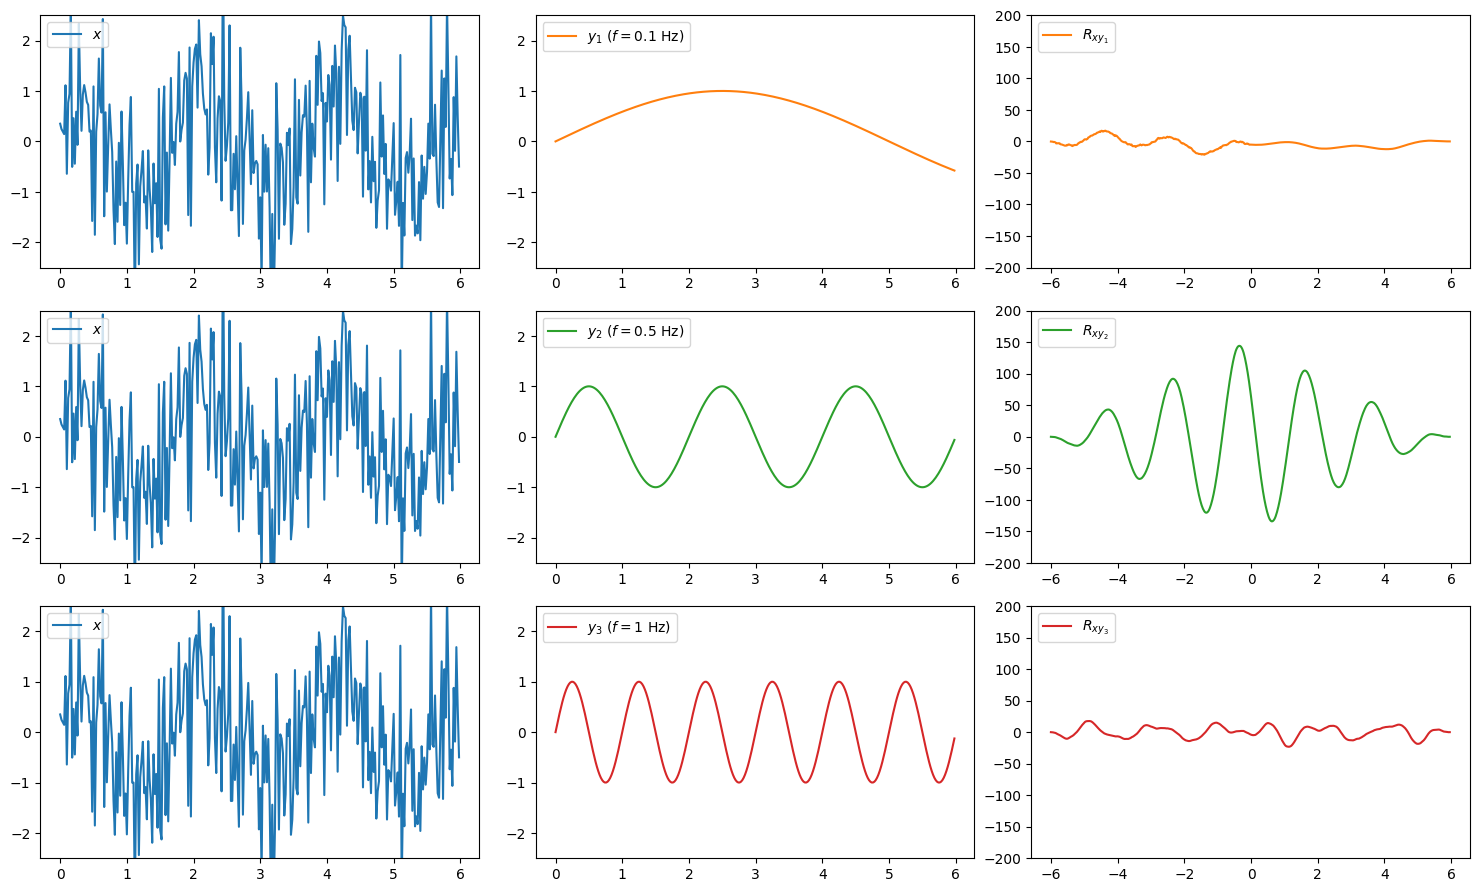

In [2]:
# Fréquences
freqs = [.1, .5, 1]

# Temps
N = 300
Te = 1/50
t = np.arange(0,N) * Te
u = np.arange(-N,N-1) * Te

# Signal bruité
x = np.sin(2*np.pi*freqs[1]*t + 1)
b = np.random.normal(0, 1, x.shape)
y = x + b

# Initialisation de l'affichage
ylim = [-2.5, 2.5]
fig, axs = plt.subplots(3, 3, figsize=(15,9))
fig.tight_layout(pad=1.0)

for i in range(3):
    
    f = freqs[i]
    
    # Signal x
    axs[i][0].plot(t, y, label='$x$', color='C0')
    
    # Signal y
    w = np.sin(2*np.pi*f*t)
    axs[i][1].plot(t, w, label=f'$y_{i+1}$ ($f={f}$ Hz)', color=f'C{i+1}')
    
    # Intercorrélation
    z = np.correlate(y, w, mode="full")
    axs[i][2].plot(u,z, label=f'$R_{{xy_{i+1}}}$', color=f'C{i+1}')
    axs[i][2].set_ylim([-200, 200])
    
    for j in range(2):
        axs[i][j].set_ylim(ylim)
    for j in range(3):
        axs[i][j].legend(loc='upper left')

plt.savefig("sinusoide.svg", bbox_inches='tight')

Intercorrélation de $x$ ( une sinusoïde bruitée de fréquence 0,5 Hz) avec un sinusoïde de fréquence variable.
La corrélation la plus forte est obtenue pour une sinusoïde de 0,5 Hz.